<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP Classification (Subreddit-Walmart & Costco)

---
Project notebook organisation:<br>
[1 - SubReddit Web Scrapping](./1_subreddit_web_and_scrapping)<br>
**2 - Exploratory Data Analysis and Preprocessing** (current notebook)<br>
[3 - Classification Model and Recommendation](./3_Classification_Model_and_Recommendation.ipynb)<br>
<br>

# Part 2: Exploratory Data Analysis and Preprocessing

### Contents:
- [1. Import Libraries](#1.-Import-Libraries)
- [2. Load Datasets](#2.-Load-Datasets)
- [3. Inspection of Datasets](#3.-Inspection-of-Datasets)
- [4. Data Cleaning and Pre Processing](#4.-Data-Cleaning-and-Pre-Processing)
- [5. Exploratory Data Analysis (EDA)](#5.-Exploratory-Data-Analysis-(EDA))

In this Part 2, the main tasks I have done are Data Exploratory and Cleaning (normal data value cleaning and stemming), followed by getting insights from visualizations-distributions, charts, top words and word cloud to get meaningful insights. 

- r/Walmart:
In general, I could seperate the top words into 3 or 4 topics:
    - (1) main top words are topics with the work/employment/leave/work notice, e.g. ['team lead','store manager','working walmart', 'hour shift', 'job offer', 'manager said']
    - (2) "covid", "vaccination","covid shot","covid leave" are also top words with Covid Vaccinations. 
    - (3) other topics like "walmart app", "promoted customer" also are popular topics been raised might because of the usage of Walmart app and comments on the customer services. 

- r/Costco:
In general, below key top words were posted:
    - (1) Food related: ["food court", "hot dog", "ice cream", "pea nut butter", "combo pizza"]
    - (2) Kirkland Signature: a Costco's private label to provide the appearance of brand name quality products at discounted prices. 
    - (3) App/ Website formatting also are hot topics been discussed, e.g. ["width format", "format pjpg"]
    - (4) Rebate cards or gift cards, discount, adjust price, coupon code, executive membership are commonly been posted as well
    - (5) Customer service: "thanks advance", "self-checkedout", "time hour"
    - (6) delivery: zip code

From the list of two-word phrases, it is apparent that: 
- Walmart subreddit contains posts from customers and employees, where users may post queries about their work.
- Costco subreddit contains mainly posts from customers, with contents surrounding 'citi card', 'ice cream', 'costco food'.

Looking into the Walmart subreddit may shed insights about the employee experience, specifically from associates working at the Walmart supermarkets. There are in line with our problem statements and objectives initiated to enhance our understanding of Walmart's Social Media Image on Reddit, in comparison to Costco, to introduce strategy for improvement.

- References: 
    - https://en.wikipedia.org/wiki/Costco#Kirkland_Signature 
    - https://www.costco.com/kirkland-signature.html

---

# 1. Import Libraries

---

In [1]:
# pip install wordcloud

In [2]:
# pip install spacy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, HashingVectorizer,TfidfVectorizer
import spacy #spacy stopwords
from spacy.lang.en import English
from nltk.corpus import stopwords
import datetime
import string

from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

%matplotlib inline

---

# 2. Load Datasets

---

In [4]:
data_path = "../datasets/02_Exploratory_Data_Analysis_and_Preprocessing/"

df_walmart = pd.read_csv(data_path  + 'walmart_scrapped_posts.csv')

df_costco = pd.read_csv(data_path  + 'costco_scrapped_posts.csv')

# 3. Inspection of Datasets

## 3.1 Data Inspection on Walmart posts

In [5]:
df_walmart.head()

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
0,walmart,1623481278,ny0t2k,"The whole meat wall, in one night?",Is that even possible?,1.0,1,15
1,walmart,1623479940,ny0hk4,Early Lunches,[removed],1.0,1,0
2,walmart,1623477525,nxzwvb,Cap 2/Overnight Team leads,"Due to unforseen circumstances, I was not able...",1.0,1,14
3,walmart,1623476491,nxzndf,Finally promoted MYSELF to customer,"This is going to be a long one so buckle up, f...",1.0,1,9
4,walmart,1623476227,nxzkvz,Pointing out after putting in your two week no...,So I submitted my 2 week notice yesterday and ...,1.0,1,11


In [6]:
df_walmart.shape

(1490, 8)

In [7]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     1490 non-null   object 
 1   created_utc   1490 non-null   int64  
 2   id            1490 non-null   object 
 3   title         1490 non-null   object 
 4   selftext      1338 non-null   object 
 5   upvote_ratio  1490 non-null   float64
 6   score         1490 non-null   int64  
 7   num_comments  1490 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.2+ KB


In [8]:
df_walmart.isnull().sum()

subreddit         0
created_utc       0
id                0
title             0
selftext        152
upvote_ratio      0
score             0
num_comments      0
dtype: int64

In [9]:
df_walmart.describe(include='all')

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
count,1490,1.490000e+03,1490,1490,1338,1490.000000,1490.000000,1490.000000
unique,1,NaN,1490,1460,1192,NaN,NaN,NaN
top,walmart,NaN,nr4fi1,Question,[removed],NaN,NaN,NaN
freq,1490,NaN,1,6,136,NaN,NaN,NaN
mean,NaN,1.622866e+09,NaN,NaN,NaN,0.978289,1.017450,9.702685
std,NaN,3.579067e+05,NaN,NaN,NaN,0.109168,0.380472,10.885425
min,NaN,1.622225e+09,NaN,NaN,NaN,0.140000,0.000000,0.000000
25%,NaN,1.622561e+09,NaN,NaN,NaN,1.000000,1.000000,3.000000
50%,NaN,1.622871e+09,NaN,NaN,NaN,1.000000,1.000000,7.000000
75%,NaN,1.623180e+09,NaN,NaN,NaN,1.000000,1.000000,13.000000


In [10]:
df_walmart[df_walmart.duplicated(subset = ['title'])]

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
101,walmart,1623395475,nx9tul,dating policy?,[removed],1.0,1,0
133,walmart,1623364610,nx0lbl,Promoted to customer,Finally was promoted to customer after I left ...,1.0,4,14
173,walmart,1623334022,nwoi7m,3 days off for vaccine,[removed],1.0,1,0
216,walmart,1623293897,nwded9,Interview next week,[removed],1.0,1,0
224,walmart,1623292173,nwcv0g,Full time,[removed],1.0,1,0
260,walmart,1623268064,nw4l6e,Ppto question,In GTA I have 00.51 current available ppto..my...,1.0,1,1
437,walmart,1623123818,nuvih1,Coaching Question,[removed],1.0,1,0
439,walmart,1623122885,nuv8l5,New Samsung phones in New Hampshire?,[removed],1.0,1,0
525,walmart,1623039267,nu3mkc,Question,If I get my 2nd covid shot on the clock get si...,1.0,1,5
538,walmart,1623025491,ntzmou,PPTO,If I called out and only had 4 hours to cover ...,1.0,1,5


In [11]:
df_walmart[df_walmart.duplicated(subset = ['selftext'])]

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
17,walmart,1623463347,nxvysh,Linz,NaN,1.0,1,1
21,walmart,1623458658,nxukn5,How much cash is in a typical drawer when coun...,NaN,1.0,1,6
30,walmart,1623452607,nxspac,Do you think Taylor swift is a virgin?,NaN,1.0,1,4
33,walmart,1623448449,nxraau,Do you think Kim kardashian is a virgin,NaN,1.0,1,4
50,walmart,1623442165,nxozw9,Do stores still price match .com?,NaN,1.0,1,4
...,...,...,...,...,...,...,...,...
1441,walmart,1622263674,nnfs2l,Wait I’m too scared to ask this at my Walmart ...,NaN,1.0,1,29
1466,walmart,1622242514,nn9wdj,TL to Coach,[removed],1.0,1,0
1469,walmart,1622240011,nn938o,Anyone ever heard of minor exceptions.,NaN,1.0,1,5
1473,walmart,1622238944,nn8pzt,Worst Walmart Product List!,[removed],1.0,1,0


### Comments:

A summary of Data Inspection on Walmart Posts:
1. "selftext" column has 152 missing values
2. Both "title" & "selftext" columns have some duplicated values
3. "selftext" column has default values, e.g. "[deleted]"
4. the post with title "Question" has the top counts.

I'll process them during the **[Data Cleaning]** part.

## 3.2 Data Inspection on Costco posts

In [12]:
df_costco.head()

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
0,Costco,1623484046,ny1g1y,Teenage girl harassed by a male employee,I was too shaken up to talk to a manager while...,1.0,1,24
1,Costco,1623468009,nxxc5b,Does Costco sell hanging baskets of flowers? R...,[removed],1.0,1,2
2,Costco,1623467264,nxx4b3,18 year anniversary,Would be my 18th year anniversary had i stayed...,1.0,1,1
3,Costco,1623463893,nxw4nm,PLEASE include the Costco location (City/State...,"I asked once ""Where did you find this item?"" -...",1.0,1,2
4,Costco,1623462565,nxvqeg,Add burgers to food court!,NaN,1.0,1,28


In [13]:
df_costco.shape

(1497, 8)

In [14]:
df_costco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     1497 non-null   object 
 1   created_utc   1497 non-null   int64  
 2   id            1497 non-null   object 
 3   title         1497 non-null   object 
 4   selftext      1430 non-null   object 
 5   upvote_ratio  1497 non-null   float64
 6   score         1497 non-null   int64  
 7   num_comments  1497 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.7+ KB


In [15]:
df_costco.isnull().sum()

subreddit        0
created_utc      0
id               0
title            0
selftext        67
upvote_ratio     0
score            0
num_comments     0
dtype: int64

In [16]:
df_costco.describe(include='all')

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
count,1497,1.497000e+03,1497,1497,1430,1497.000000,1497.000000,1497.000000
unique,1,NaN,1497,1494,1157,NaN,NaN,NaN
top,Costco,NaN,nikocv,PICKL,[removed],NaN,NaN,NaN
freq,1497,NaN,1,2,263,NaN,NaN,NaN
mean,NaN,1.620813e+09,NaN,NaN,NaN,0.993246,1.008016,11.607214
std,NaN,1.532700e+06,NaN,NaN,NaN,0.058745,0.206680,17.427563
min,NaN,1.617845e+09,NaN,NaN,NaN,0.200000,0.000000,0.000000
25%,NaN,1.619545e+09,NaN,NaN,NaN,1.000000,1.000000,3.000000
50%,NaN,1.620770e+09,NaN,NaN,NaN,1.000000,1.000000,7.000000
75%,NaN,1.622145e+09,NaN,NaN,NaN,1.000000,1.000000,14.000000


In [17]:
df_costco[df_costco.duplicated(subset = ['title'])]

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
871,Costco,1620356979,n6oxyy,PICKL,Hey Yall!\n\nPICKL is a great resource because...,1.0,1,0
1268,Costco,1619040001,mvpqqf,CA SUPPL paid sick leave,I was curious we got this added to our paystub...,1.0,1,1
1452,Costco,1617993131,mnnkro,Kirkland bottled water + do Costco sales alway...,[removed],1.0,1,0


In [18]:
df_costco[df_costco.duplicated(subset = ['selftext'])]

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
25,Costco,1623361605,nwzg5o,Just Received Member-Only Savings Ad for 4/14/...,[removed],1.00,1,2
32,Costco,1623346595,nwthsd,Looking for a position in Costco as a cashier!,[removed],1.00,1,4
33,Costco,1623343745,nwsck3,I understand the cost advantages of purchasing...,[deleted],0.33,0,8
57,Costco,1623257829,nw0mu7,"Who has purchased OVE Decors Lakeview 60"" Vanity?",[deleted],1.00,1,0
69,Costco,1623222208,nvpksi,First day working at food court tomorrow any t...,NaN,1.00,1,2
...,...,...,...,...,...,...,...,...
1454,Costco,1617988665,mnm25w,Curious - software programs that Costco employ...,[removed],1.00,1,0
1458,Costco,1617981547,mnjh3o,Tramontina Dutch Ovens,[removed],1.00,1,2
1470,Costco,1617920757,mn36kq,"Got 4 Michelin tires today, got flyer today sa...",[removed],1.00,1,1
1471,Costco,1617919810,mn2uu7,Potential Hiring Probability,[removed],1.00,1,1


### Comments:

A summary of Data Inspection on Costco Posts:
1. "selftext" column has 67 missing values, which is quite less than Walmart's posts.
2. Both "title" & "selftext" columns have some duplicated values
3. "selftext" column has default values, e.g. "[deleted]" or "[removed]".
4. the post with title "PICKL" has the top counts.

I'll process them during the **[Data Cleaning]** part.

# 4. Data Cleaning and Pre Processing

## 4.1 Data Cleaning

A summary of what I have applied during Data Cleaning process for 2 text fields: (1) "title", (2) "selftext".

Most "title" field doesn't really give meaningful text for the post, therefore, I will concate these 2 fields as a new column to include both the posts title and body. 

Below most common text cleaning steps had applied by Regex library (Regular Expression library with powerful pattern & string searching functions):
- <em>remove emoji</em>
- <em>remove defalut text with format of "[]", e.g. "[removed]" or "[deleted]" </em>
- <em>remove non-letters</em>
- <em>remove html special entities , e.g. &amp;</em>
- <em>remove punctuation</em>
- <em>remove hypterlinks</em>
- <em>remove whitespace</em>
- <em>remove words with 2 or fewer letters</em>
- <em>remove characters beyond Basic Multilingual Plane (BMP) of Unicode</em>
After above steps have been done, a cleaned corpus has been saved as clean dataset.

The cleaned corpus have saved into cleaned 2 csv files for modelling.

### 4.1.1 Change "[removed]" / "[deleted]" to blank from selftext

#### 4.1.1.1 selftext column in Walmart posts

In [19]:
# change default values "[removed]" / "[deleted]" to blank from selftext
df_walmart.loc[(df_walmart['selftext'] == '[removed]') | (df_walmart['selftext'] == '[deleted]'), 'selftext'] = ""

#### Comments: 

The default values "[removed]", "[deleted]" have been removed as blank from "title" & "selftext" columns.

In [20]:
df_walmart.isnull().sum()

subreddit         0
created_utc       0
id                0
title             0
selftext        152
upvote_ratio      0
score             0
num_comments      0
dtype: int64

In [21]:
df_walmart.describe(include='all')

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
count,1490,1.490000e+03,1490,1490,1338,1490.000000,1490.000000,1490.000000
unique,1,NaN,1490,1460,1191,NaN,NaN,NaN
top,walmart,NaN,nr4fi1,Question,,NaN,NaN,NaN
freq,1490,NaN,1,6,145,NaN,NaN,NaN
mean,NaN,1.622866e+09,NaN,NaN,NaN,0.978289,1.017450,9.702685
std,NaN,3.579067e+05,NaN,NaN,NaN,0.109168,0.380472,10.885425
min,NaN,1.622225e+09,NaN,NaN,NaN,0.140000,0.000000,0.000000
25%,NaN,1.622561e+09,NaN,NaN,NaN,1.000000,1.000000,3.000000
50%,NaN,1.622871e+09,NaN,NaN,NaN,1.000000,1.000000,7.000000
75%,NaN,1.623180e+09,NaN,NaN,NaN,1.000000,1.000000,13.000000


### Comments:
1. We can see from above description the max score is 6 for Walmart posts, and max with 91 comments.
2. The top posts with title "Question" which actually from the title itself We are not able to extract meaningful contents from the post. That's why I will merge "title" & "selftext" into 1 new column for text mining and modeling. 

In [22]:
# display the first 3 rows again after the data cleaning
df_walmart.head(3)

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
0,walmart,1623481278,ny0t2k,"The whole meat wall, in one night?",Is that even possible?,1.0,1,15
1,walmart,1623479940,ny0hk4,Early Lunches,,1.0,1,0
2,walmart,1623477525,nxzwvb,Cap 2/Overnight Team leads,"Due to unforseen circumstances, I was not able...",1.0,1,14


#### 4.1.1.2 selftext column in Costco posts

In [23]:
# change default values "[removed]" / "[deleted]" to blank from selftext
df_costco.loc[(df_costco['selftext'] == '[removed]') | (df_costco['selftext'] == '[deleted]'), 'selftext'] = "" 

In [24]:
df_costco.isnull().sum()

subreddit        0
created_utc      0
id               0
title            0
selftext        67
upvote_ratio     0
score            0
num_comments     0
dtype: int64

In [25]:
df_costco.describe(include='all')

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments
count,1497,1.497000e+03,1497,1497,1430,1497.000000,1497.000000,1497.000000
unique,1,NaN,1497,1494,1156,NaN,NaN,NaN
top,Costco,NaN,nikocv,PICKL,,NaN,NaN,NaN
freq,1497,NaN,1,2,272,NaN,NaN,NaN
mean,NaN,1.620813e+09,NaN,NaN,NaN,0.993246,1.008016,11.607214
std,NaN,1.532700e+06,NaN,NaN,NaN,0.058745,0.206680,17.427563
min,NaN,1.617845e+09,NaN,NaN,NaN,0.200000,0.000000,0.000000
25%,NaN,1.619545e+09,NaN,NaN,NaN,1.000000,1.000000,3.000000
50%,NaN,1.620770e+09,NaN,NaN,NaN,1.000000,1.000000,7.000000
75%,NaN,1.622145e+09,NaN,NaN,NaN,1.000000,1.000000,14.000000


### Comments:
1. We can see from above description the max score is 4 for Costco posts, and max with 202 comments. 
- Compared with Walmart's Posts, people are more likely to comment on Costco posts.

2. The top posts with title "off coupon" which We could roughly know people has high interests in the Costco Coupon and can apply to future purchases. I will do further data examination from the top words of what people talked about in Costco Posts.

### 4.1.2 Text content Cleaning on title & selftext

In [26]:
# As I can see some emojis in the title and selftext, it needs to be removed
def remove_emoji(text):
    RE_EMOJI = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    return RE_EMOJI.sub(r'', text)

In [27]:
# Create function to use Re library to do the text cleaning
def content_cleaner(text):
    
    # Make lowercase
    text = text.lower()
    
    # Remove non-letters
    text = re.sub("[^a-zA-Z]", " ", text)
    text = re.sub('\w*\d\w', '', text) # any words with numbers

    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    
    # Remove title/posts content with default []
    text = re.sub('\[.*?\]','', text)
    
    # Remove hyperlinks
    #text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuation and split 's, 't, 've with a space for filter
    # text = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', text)
    
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    
    # Remove emoji
    text = remove_emoji(text)
    
    # Remove some additional punctuations and non-sensical text
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n','',text)
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = ''.join(w for w in text if w <= '\uFFFF') 
    
    return text

In [28]:
# Apply cleaner function in Walmart & Costco post
df_walmart['title']  = df_walmart['title'].astype(str)
df_walmart['selftext'] = df_walmart['selftext'].astype(str)

df_walmart['title'] = df_walmart['title'].apply(content_cleaner)
df_walmart['selftext'] = df_walmart['selftext'].apply(content_cleaner)

# Apply cleaner function in Costco post

df_costco['title']  = df_costco['title'].astype(str)
df_costco['selftext'] = df_costco['selftext'].astype(str)

df_costco['title'] = df_costco['title'].apply(content_cleaner)
df_costco['selftext'] = df_costco['selftext'].apply(content_cleaner)

In [29]:
df_costco.shape

(1497, 8)

In [30]:
df_walmart.shape

(1490, 8)

### Comments:
After above data cleaning steps, I get a total of 1490 Walmart posts & 1497 Costco posts for further Data Pre-processing.

## 4.2 Data Pre-processing

A summary of pre-processing have been done on both 2 posts DataFrame:
- <em> Converted post created date </em>: to be DateTime format for easy interpretation
- <em> Merged "title" & "selftext" into new "text" column </em>
- <em> Engineer new field-"post_length", "title_length" & "self_length" for number of words in each post </em>
- <em> Mapped 0/1 to 2 types subreddits </em>
- <em> Lemematization </em>
- <em> Defined stopwords functions & Remove stopwords </em> 

Duplicated 
Some distributions also examined, after Data has been cleaned and pre-processed, 2 cleaned Datasets will be saved for future use: cleaned corpus & bag-of-words.

### 4.2.1 Convert post created date

In the post field"utc_time" is the format of Epoch & Unix Timestamp, it's not a easy readable timestamp, and I will do the conversion to "yyyy-mm-dd hh:mm:ss" format.

In [31]:
# Add convert the date from UTC interger to interpretable date

# Handle the post created date for Walmart posts
post_created_date = [datetime.datetime.fromtimestamp(utc_time) for utc_time in df_walmart['created_utc']]
df_time= pd.DataFrame({'post_created_date':post_created_date})
df_time.shape

(1490, 1)

In [32]:
df_walmart.shape

(1490, 8)

In [33]:
df_walmart['post_created_date'] = df_time['post_created_date']
df_walmart[['post_created_date','created_utc']].head(3)

,post_created_date,created_utc
0,2021-06-12 15:01:18,1623481278
1,2021-06-12 14:39:00,1623479940
2,2021-06-12 13:58:45,1623477525


In [35]:
min_posts_datetime = df_walmart['post_created_date'].min()
max_posts_datetime =df_walmart['post_created_date'].max()

print (f'The Walmart posts are from {min_posts_datetime} to {max_posts_datetime}')

The Walmart posts are from 2021-05-29 01:59:22 to 2021-06-12 15:01:18


In [36]:
 df_walmart.shape

(1490, 9)

In [38]:
# Handle the post created date for Costco posts
post_created_date = [datetime.datetime.fromtimestamp(utc_time) for utc_time in df_costco['created_utc']]
df_time= pd.DataFrame({'post_created_date':post_created_date})
df_time.shape

(1497, 1)

In [39]:
df_costco.shape

(1497, 8)

In [40]:
df_costco['post_created_date'] = df_time['post_created_date']
df_costco[['post_created_date','created_utc']].head(3)

,post_created_date,created_utc
0,2021-06-12 15:47:26,1623484046
1,2021-06-12 11:20:09,1623468009
2,2021-06-12 11:07:44,1623467264


In [41]:
min_posts_datetime = df_costco['post_created_date'].min()
max_posts_datetime =df_costco['post_created_date'].max()

print (f'The Costco posts are from {min_posts_datetime} to {max_posts_datetime}')

The Costco posts are from 2021-04-08 09:23:11 to 2021-06-12 15:47:26


In [42]:
df_walmart.shape

(1490, 9)

#### Comments:

A new column --"post_created_date" with datetime format has been added to both Walmart & Costco posts dataframe.	

### 4.2.2 Merge 2 Posts into 1 DataFrame and processing

In [43]:
# Merge 2 posts into 1 DataFrame
df = pd.concat([df_walmart, df_costco], ignore_index=True)

#### 4.2.2.1 Combine "title" & "selftext" into 1 new column-"text"

In [44]:
df['text'] = df['title'] + " "+ df['selftext']
df['text'] = df['text'].astype(str)

In [45]:
# new column of posts text length
df['text_length'] = df['text'].apply(len)

# new column of words count for "text" column
df['text_word_count'] = df['text'].map(lambda x: len(x.split()))

In [46]:
# drop the text with short words
index_names = df[df['text_word_count']<=2]
df.drop(index_names.index, inplace = True)

In [47]:
df.shape

(2899, 12)

### Comments:

3 new columns have been created: (by merging "title" and "selftext" into text column)
- text
- text_length
- text_word_count

#### 4.2.2.2 Mapped 0/1 to 2 types subreddits

In [48]:
# Changing subreddit to int 1 and 0
df['subreddit_type'] = df['subreddit'].map({'walmart': 0, 'Costco': 1})

In [49]:
df.head(3)

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments,post_created_date,text,text_length,text_word_count,subreddit_type
0,walmart,1623481278,ny0t2k,the whole meat wall one night,that even possible,1.0,1,15,2021-06-12 15:01:18,the whole meat wall one night that even poss...,51,9,0
2,walmart,1623477525,nxzwvb,cap overnight team leads,due unforseen circumstances was not able apply...,1.0,1,14,2021-06-12 13:58:45,cap overnight team leads due unforseen circums...,494,82,0
3,walmart,1623476491,nxzndf,finally promoted myself customer,this going long one buckle first just wanna sa...,1.0,1,9,2021-06-12 13:41:31,finally promoted myself customer this going lo...,2478,431,0


In [50]:
df.shape

(2899, 13)

### 4.2.3 Lemmatization

By doing stemming and lemmatization will help to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Compared with stemming, I will apply lemmatization instead as it's better than stemming. 

Stemming algorithm works by cutting the suffix from the word. In a broader sense cuts either the beginning or end of the word.

On the contrary, Lemmatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms. In-depth linguistic knowledge is required to create dictionaries and look for the proper form of the word. Stemming is a general operation while lemmatization is an intelligent operation where the proper form will be looked in the dictionary. Hence, lemmatization helps in forming better machine learning features.

In [51]:
# I have chosen to use lemmatizer over porter stemmer because 
# Lemmatization, takes into consideration the morphological analysis of the words.
lemmatizer = WordNetLemmatizer()

In [53]:
def lemmatize_words(text):
    words = text.split()
    lemma_words = ''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
        
    return lemma_words

In [54]:
df['text'] = df['text'].apply(lemmatize_words)

In [55]:
df['text'][0]

'the whole meat wall one night that even possible '

### 4.2.4 Final clenning and Save cleaned corpus

Check again on the duplicated "text" posts also handle the outliers.

In [56]:
df.shape

(2899, 13)

In [57]:
# check & remove duplicated "text" column 
index_names=df[df.duplicated(subset='text')]
index_names['subreddit'].value_counts()

walmart    2
Name: subreddit, dtype: int64

In [58]:
df.drop(index_names.index, inplace = True)

In [59]:
df.shape

(2897, 13)

#### Comments:

I have removed the duplicated posts- 2 duplicated "text" in Walmart's posts, and get in total 2892 posts.

C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Text Length Distribution Plot'}, xlabel='text_word_count', ylabel='Frequency'>

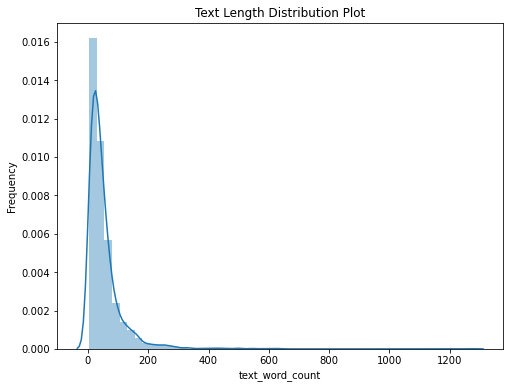

In [60]:
plt.figure(figsize=(8,6))
plt.title('Text Length Distribution Plot')
plt.ylabel('Frequency')
sns.distplot(df['text_word_count'])

### Comments:

- The majority posts are with less than 400 words, and seems there are some outliers.
- It's not normally distributed and it is right skewed. 

In [61]:
df[df['text_word_count']>400]['subreddit'].value_counts()

walmart    10
Costco      6
Name: subreddit, dtype: int64

In [62]:
df.drop(df[df['text_word_count']>400].index, axis=0, inplace=True)

In [63]:
# reset index after dropping outliers & duplicated text posts
df.reset_index(drop=True)

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments,post_created_date,text,text_length,text_word_count,subreddit_type
0,walmart,1623481278,ny0t2k,the whole meat wall one night,that even possible,1.0,1,15,2021-06-12 15:01:18,the whole meat wall one night that even possible,51,9,0
1,walmart,1623477525,nxzwvb,cap overnight team leads,due unforseen circumstances was not able apply...,1.0,1,14,2021-06-12 13:58:45,cap overnight team lead due unforseen circumst...,494,82,0
2,walmart,1623476227,nxzkvz,pointing out after putting your two week notice,submitted week notice yesterday and points so...,1.0,1,11,2021-06-12 13:37:07,pointing out after putting your two week notic...,233,36,0
3,walmart,1623476044,nxzj9q,they drug test,just got job local walmart truck unloader but...,1.0,1,8,2021-06-12 13:34:04,they drug test just got job local walmart truc...,88,16,0
4,walmart,1623475101,nxzalp,there way limit hours availability online,basically they scheduled for hours part time e...,1.0,1,7,2021-06-12 13:18:21,there way limit hour availability online basic...,256,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,Costco,1617849316,mmi424,you could make one food item available your l...,doesn necessarily have discontinued previous m...,1.0,1,80,2021-04-08 10:35:16,you could make one food item available your lo...,191,30,1
2877,Costco,1617848898,mmhzp4,help for covid shots,wondering this happening company wide but are ...,1.0,1,1,2021-04-08 10:28:18,help for covid shot wondering this happening c...,839,138,1
2878,Costco,1617847365,mmhjg1,nutrition facts for meat,this might weird question but does anyone know...,1.0,1,5,2021-04-08 10:02:45,nutrition fact for meat this might weird quest...,457,75,1
2879,Costco,1617845175,mmgwpz,does anyone know they ever bringing back the c...,they brought back the churro and the seating d...,1.0,1,20,2021-04-08 09:26:15,doe anyone know they ever bringing back the co...,204,35,1


In [64]:
df.shape

(2881, 13)

### Comments:

There are in total 16 posts are outliers with more than 400 words which 10 are Walmart posts and the other 6 are Costco posts. I've removed the 16 outlier posts.

After removing the outliers & duplicated text posts, I have total 2881 posts for the 2 subreddits.

In [65]:
df['subreddit'].value_counts(normalize = True)

Costco     0.50538
walmart    0.49462
Name: subreddit, dtype: float64

#### Comments:

There are almost some porportion posts from Walmart subreddit and Costco subreddit in cleaned corpus.

In [66]:
df.columns

Index(['subreddit', 'created_utc', 'id', 'title', 'selftext', 'upvote_ratio',
       'score', 'num_comments', 'post_created_date', 'text', 'text_length',
       'text_word_count', 'subreddit_type'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2881 entries, 0 to 2986
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   subreddit          2881 non-null   object        
 1   created_utc        2881 non-null   int64         
 2   id                 2881 non-null   object        
 3   title              2881 non-null   object        
 4   selftext           2881 non-null   object        
 5   upvote_ratio       2881 non-null   float64       
 6   score              2881 non-null   int64         
 7   num_comments       2881 non-null   int64         
 8   post_created_date  2881 non-null   datetime64[ns]
 9   text               2881 non-null   object        
 10  text_length        2881 non-null   int64         
 11  text_word_count    2881 non-null   int64         
 12  subreddit_type     2881 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory us

In [68]:
df.describe(include= 'all')

<ipython-input-68-e4fb93151184>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include= 'all')


,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments,post_created_date,text,text_length,text_word_count,subreddit_type
count,2881,2.881000e+03,2881,2881,2881,2881.000000,2881.000000,2881.000000,2881,2881,2881.000000,2881.000000,2881.000000
unique,2,NaN,2881,2820,2323,NaN,NaN,NaN,2877,2881,NaN,NaN,NaN
top,Costco,NaN,nr4fi1,question,,NaN,NaN,NaN,2021-06-08 21:43:09,mohawk vinyl plank the vinyl plank were taken ...,NaN,NaN,NaN
freq,1456,NaN,1,7,332,NaN,NaN,NaN,2,1,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 09:23:11,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-12 15:47:26,NaN,NaN,NaN,NaN
mean,NaN,1.621830e+09,NaN,NaN,NaN,0.986234,1.014578,10.864283,NaN,NaN,293.752864,49.248872,0.505380
std,NaN,1.517544e+06,NaN,NaN,NaN,0.085794,0.309226,14.677103,NaN,NaN,292.962806,49.616301,0.500058
min,NaN,1.617845e+09,NaN,NaN,NaN,0.140000,0.000000,0.000000,NaN,NaN,14.000000,3.000000,0.000000
25%,NaN,1.620745e+09,NaN,NaN,NaN,1.000000,1.000000,3.000000,NaN,NaN,106.000000,18.000000,0.000000


### Comments:

- All duplicated "text" posts have been removed. There are total 2892 titles & text, with unique 2831 titles and unique 2337 selftext.

- The mean of upvote_ratio is 0.98, meaning out of 10 votes there are around 9-10 votes in support. It has a low standards deviation of 0.086564 meaning that the data is close together.

- The mean for "number of comment" is 10.86, meaning per posts there is average around 11 comments. Standard Deviation of 14.5, meaning the comments are not so wide spread with min of 0 and max of 202.

In [69]:
# Export the cleaned corpus into csv file
data_path = "../datasets/02_Exploratory_Data_Analysis_and_Preprocessing/"
df.to_csv(data_path + "cleaned_posts_corpus.csv", index=False)

# 5. Exploratory Data Analysis (EDA)

## 5.1 Correlation Heatmap

Let's take a look at the correlation between variables and what variables have high correlation to the subreddits.

<AxesSubplot:title={'center':'Correlation Matrix'}>

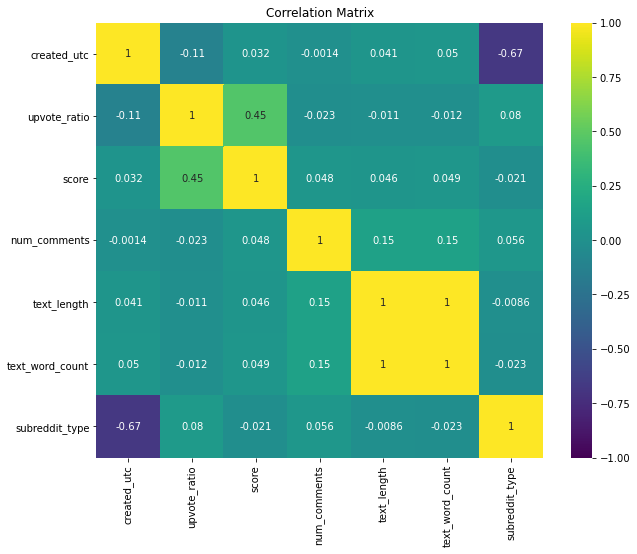

In [70]:
plt.figure(figsize=(10,8))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),
           annot=True,
           cmap='viridis',
           vmin=-1)

### Comments:
- Seems "created_utc" has negative correlation with the subrredit_type, but it is not really reasonable to interpretate it as "created_utc" is integer timestamp.
- There is moderate correlation between score and upvote_ratio (0.45)

## 5.2 Visualizations

In [71]:
df.groupby(['subreddit']).mean()[['text_length', 'text_word_count','num_comments', 'upvote_ratio']]

,text_length,text_word_count,num_comments,upvote_ratio
subreddit,,,,
Costco,291.266484,48.118132,11.675137,0.993056
walmart,296.293333,50.404211,10.035789,0.979263


Text(0.5, 1.0, 'Score vs Number of Comments')

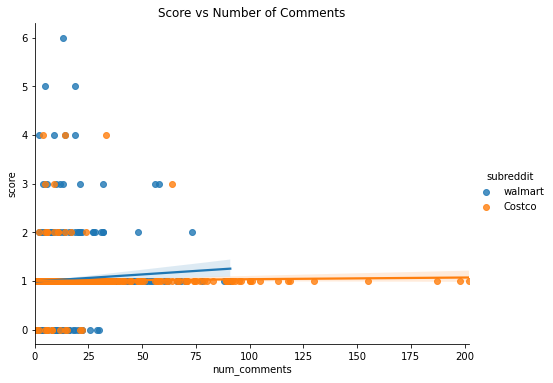

In [72]:
sns.lmplot(x='num_comments',y='score',data=df, hue='subreddit', height= 5, aspect=1.3)
ax = plt.gca()
ax.set_title("Score vs Number of Comments")

### Comments:

Comparing the 2 subreddits:
- There is a slightly longer text posts length & word counts in Walmart posts
- There is more comments and upvote_ratio in Costco posts

From above statistics, it can be inferred people tend to do more comments on Costco which they might have same topics to been raised in posts and that's why there are higher votes also. While for Walmart posts, people like to write more content to share their questions/feedback and their topics might be diversity. 

After doing the research, Walmart has divided their business into 3 main segments: Sam's Club, Walmart Internations and Walmart U.S. While Costco is a Wholesale Corporation, topics discussion for Costco would be mainly focus on their products or sales services.

- Reference: https://www.statista.com/statistics/269415/share-of-walmarts-net-sales-by-division/

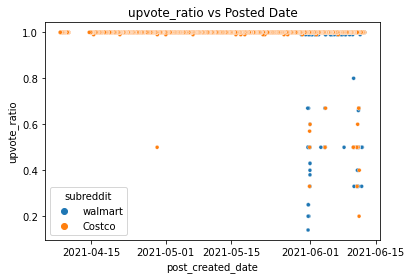

In [73]:
plt.figure(figsize = (6,4))
plt.title("upvote_ratio vs Posted Date")
sns.scatterplot( x="post_created_date", y="upvote_ratio", hue="subreddit", s=15, data=df);

### Comments:

- It seems majority Costco posts got the 100% up votes which implies that most people have same feeling and concerns been addressed & posted. 

- While Walmart posts had a relatively low up votes ratio, it could because of diversity business involvement or people have different opinions or questions on what they encountered.

- Also We could see the up votes ratio is quite consistent for Costco posts, which might because of all along consistent performance did by Costco. From our research of the Customer Satifaction survey, We could see Costco ranked top 2 in consectively year 2019 and 2020 and with almost 0% drop in covid year 2020.

- Reference: https://www.supermarketnews.com/issues-trends/customer-satisfaction-fell-supermarkets-2020 

- By looking at the posts count and their posted time, We could see that people have more posts on Walmart, as Walmart has same amount of posts in less than 1 month while Costco posts in about 2 months.
This might due to its business diversity or it's more popular compared to Costco, or may because of more policy/market direction adjustments in Walmart. I will do more research on this.  

From further text analysis, We could see what top words/topics been posts in both Walmart & Costco subreddits.

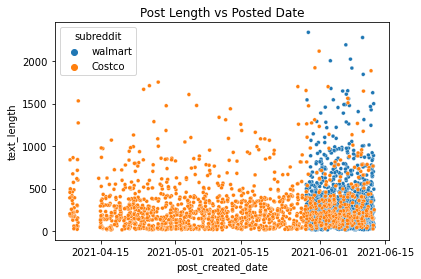

In [74]:
plt.figure(figsize = (6,4))
plt.title("Post Length vs Posted Date")
sns.scatterplot( x="post_created_date", y="text_length", hue="subreddit", s=15, data=df);

### Comments:

- We can see most Costco posts with around 500 length, while people gave more sharings on Walmart posts.

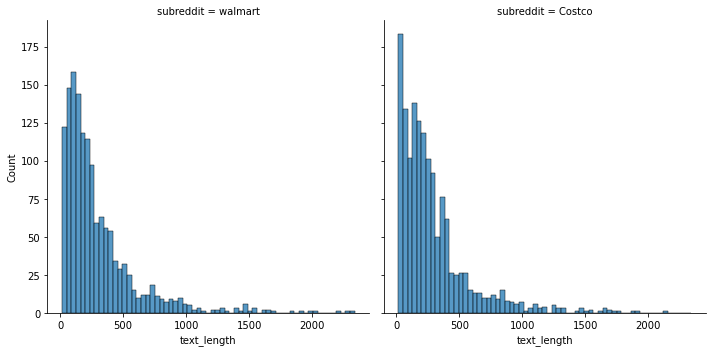

In [77]:
sns.displot(df, x="text_length", col="subreddit", multiple="dodge")

### Comments:

- Both text_length distribution for these 2 subreddit posts are not normal distributted, it's right skewed. 
- Costco has slightl with less than 500

## 5.3 Top Words

__CountVectorizer__

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called tokenization. These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization).

Scikit-learn’s CountVectorizer is used for below Top Words analysis by converting a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. CountVectorizer implements both tokenization and occurrence counting in a single class:

Instead of looking at single word, and able to get more meaningful words, I have set parameter to check bi/tri-grams.

__Stopwords__

To look at the most common words been discussed in 2 subreddit posts, also to extract meaningful words/topics after removing stopwords and vectorization.

I've combined stopwords from 3 different libraries: nltk, spacy & sklearn to get as much as possible stopwords, as Stopwords are the words in language which does not add much meaning to a sentence. Also I've updated more common words as they are repeated after running with default stop words but without much meanings to our analysis.

When using the default stop-words, I also see some common words with f-words and s-words in the text, but I will not remove them as it will be helpful for sentiment analysis and business recommendation.

In [78]:
# define the function to combine stop words from 3 different libraries: nltk, spacy & sklearn to get as much as possible. 

def get_stopwords():
    nltk_stopwords = set(stopwords.words('english'))
    spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
    sklearn_stopwords = set(ENGLISH_STOP_WORDS)

    all_stopwords = set()
    all_stopwords |= spacy_stopwords
    all_stopwords |= nltk_stopwords
    all_stopwords |= sklearn_stopwords

    return all_stopwords 

all_stopwords = get_stopwords()

In [79]:
len(all_stopwords)

409

In [80]:
# Update stopwords as they repeated with high frequency in the text but not much meaning 
all_stopwords.update(['www', 'costco', 'wa', 'doe','ha','know',
                      'told','feel','like','tikok','com', 'webp', 'amp', 'html','walmart', "wal", "mart"])

In [81]:
len(all_stopwords)

426

### Comments:

In total there are 423 stopwords.

In [82]:
df.head(3)

,subreddit,created_utc,id,title,selftext,upvote_ratio,score,num_comments,post_created_date,text,text_length,text_word_count,subreddit_type
0,walmart,1623481278,ny0t2k,the whole meat wall one night,that even possible,1.0,1,15,2021-06-12 15:01:18,the whole meat wall one night that even possible,51,9,0
2,walmart,1623477525,nxzwvb,cap overnight team leads,due unforseen circumstances was not able apply...,1.0,1,14,2021-06-12 13:58:45,cap overnight team lead due unforseen circumst...,494,82,0
4,walmart,1623476227,nxzkvz,pointing out after putting your two week notice,submitted week notice yesterday and points so...,1.0,1,11,2021-06-12 13:37:07,pointing out after putting your two week notic...,233,36,0


In [83]:
df_walmart =df[df['subreddit_type'] == 0]
df_costco = df[df['subreddit_type'] == 1]

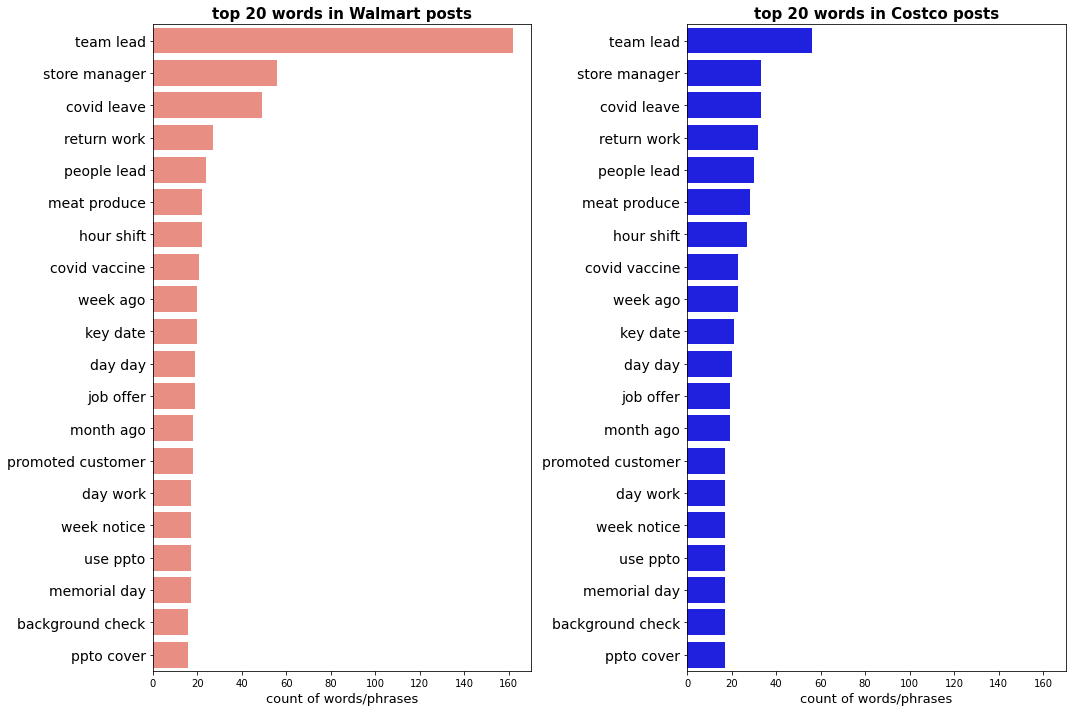

In [84]:
# instantiate a basic vectoriser with only settings for extracting bi- and tri-grams
cvec = CountVectorizer(stop_words = all_stopwords, ngram_range=(2,3))

# r/Walmart - fit/transform count vectoriser to title and get the 20 phrases with the highest count
vec_walmart = cvec.fit_transform(df_walmart['text'])
vec_walmart = pd.DataFrame(vec_walmart.toarray(), columns = cvec.get_feature_names())
df_walmart_20 = vec_walmart.sum().sort_values(ascending=False).head(20)

# r/Costco - fit/transform count vectoriser to title and get the 50 phrases with the highest count
vec_costco = cvec.fit_transform(df_costco['text'])
vec_costco = pd.DataFrame(vec_costco.toarray(), columns = cvec.get_feature_names())
df_costco_20 = vec_costco.sum().sort_values(ascending=False).head(20)

# plot results
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

sns.barplot(y=df_walmart_20.index.values, x = df_walmart_20,color='salmon',ax=ax[0])
#sns.barplot(df_walmart_50.index, 'count', data=df_walmart_50, palette='dark:salmon_r')

ax[0].set_title('top 20 words in Walmart posts',fontsize=15, weight = 'bold')
ax[0].set_xlabel('count of words/phrases', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=df_walmart_20.index.values, x = df_costco_20,color='blue',ax=ax[1])
ax[1].set_title('top 20 words in Costco posts',fontsize=15, weight = 'bold')
ax[1].set_xlabel('count of words/phrases', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

From the top lists We could see:
- r/Walmart:
In general, I could seperate the top words into 3 or 4 topics:
    - (1) main top words are topics with the work/employment/leave/work notice, e.g. ['team lead','store manager','working walmart', 'hour shift', 'job offer', 'manager said']
    - (2) "covid", "vaccination","covid shot","covid leave" are also top words with Covid Vaccinations. 
    - (3) other topics like "walmart app", "promoted customer" also are popular topics been raised might because of the usage of Walmart app and comments on the customer services. 

- r/Costco:
In general, below key top words were posted:
    - (1) Food related: ["food court", "hot dog", "ice cream", "pea nut butter", "combo pizza"]
    - (2) Kirkland Signature: a Costco's private label to provide the appearance of brand name quality products at discounted prices. 
    - (3) App/ Website formatting also are hot topics been discussed, e.g. ["width format", "format pjpg"]
    - (4) Rebate cards or gift cards, discount, adjust price, coupon code, executive membership are commonly been posted as well
    - (5) Customer service: "thanks advance", "self-checkedout", "time hour"
    - (6) delivery: zip code
* References: 
    - https://en.wikipedia.org/wiki/Costco#Kirkland_Signature 
    - https://www.costco.com/kirkland-signature.html

In [85]:
# Export the cleaned corpus into csv file, will be used for part 3-sentiment analysis and business recommendation
data_path = "../datasets/02_Exploratory_Data_Analysis_and_Preprocessing/"
# df.to_csv(data_path + "cleaned_posts_corpus.csv", index=False)
df_walmart_20.to_csv(data_path + "walmart_top20_words.csv")
df_costco_20.to_csv(data_path + "costco_top20_words.csv")

## 5.4 Word Cloud

In [86]:
# From https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=all_stopwords,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

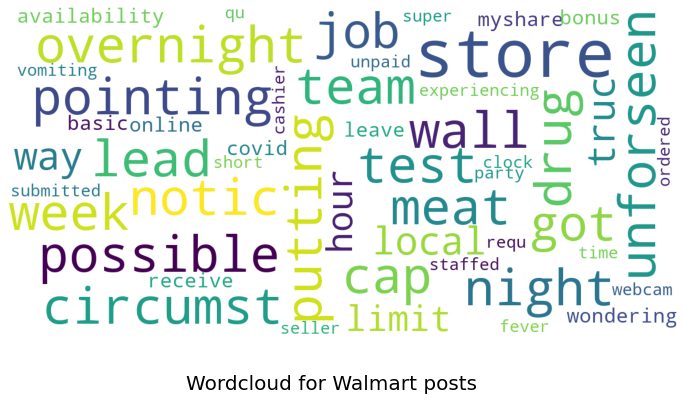

In [87]:
show_wordcloud(df[df['subreddit_type']==0]['text'], title ='Wordcloud for Walmart posts')

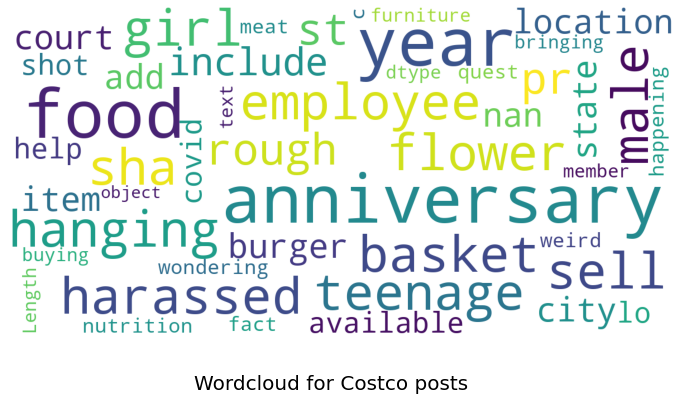

In [88]:
show_wordcloud(df[df['subreddit_type']==1]['text'], title ='Wordcloud for Costco posts')

### Comments: 

From the list of two-word phrases, it is apparent that: 
Walmart subreddit contains posts from customers and employees, where users may post queries about their work, i.e. regarding their 'team lead', 'covid leave', 'night shift'.
Costco subreddit contains mainly posts from customers, with contents surrounding 'citi card', 'ice cream', 'costco food'.

Looking into the Walmart subreddit may shed insights about the employee experience, specifically from associates working at the Walmart supermarkets.

#### __Please go to Notebook 03_Classification_Model_and _Recommendation.ipynb__